# Comparing Different Search Strategies: Maze

Notes on breaking ties: 

* The order in which the children are explored (see `available directions`) makes a big difference for DFS and dealing with empty spaces. I explore the directions in random order which makes the algorithm stochastic!
* Ties for $h(n)$ and $f(n)$ need to be broken in a consistent manner. I use the most recently added node. To try to keep moving into the same direction.



Helper functions for the Maze Assignment by M. Hahsler
Usage: 
  import maze_helper as mh
  mh.show_some_mazes()
  
Here is an example maze:

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX

The goal is at (np.int64(8), np.int64(1)).
Position(0,0): X
Position(8,1):  


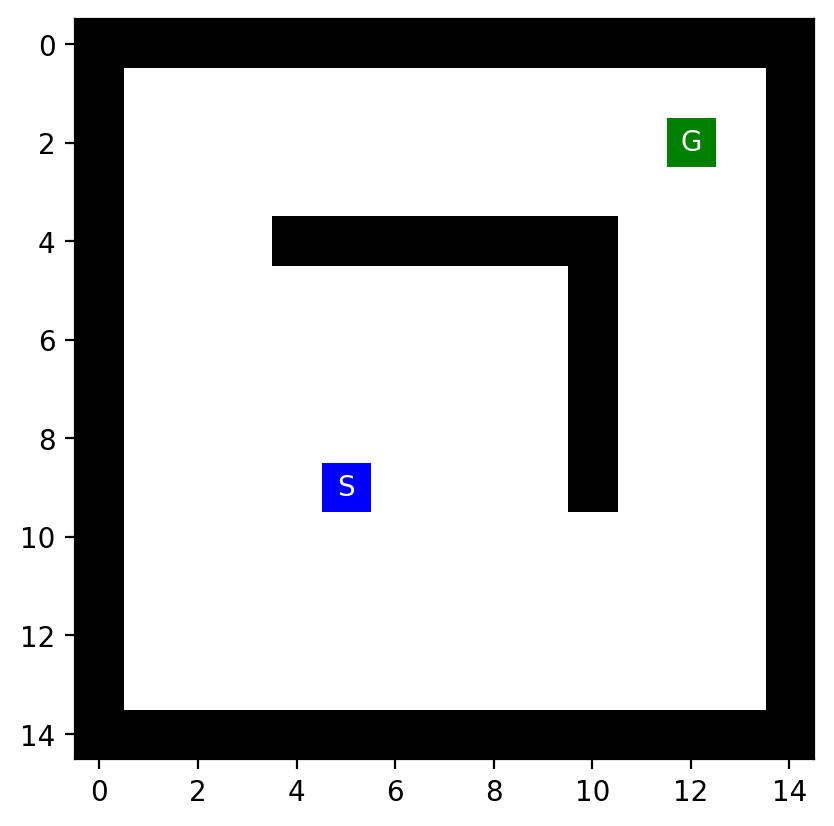

In [1]:
%run maze_helper.py
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

#f = open("small_maze.txt", "r")
#f = open("medium_maze.txt", "r")
#f = open("large_maze.txt", "r")    # this has only one solution!
#f = open("open_maze.txt", "r")
#f = open("empty_maze.txt", "r")
#f = open("empty_maze_2.txt", "r")
#f = open("loops_maze.txt", "r")
f = open("L_maze.txt", "r")

maze_str = f.read()
maze = parse_maze(maze_str)

# look at two positions in the maze
print("Position(0,0):", maze[0, 0])
print("Position(8,1):", maze[8, 1])

show_maze(maze)

## Implementation

My implementation follows the pseudo code from the slides/textbook.

In [2]:
# tree_search_solution.py has my actual implementation (not published)
import tree_search_solution as ts


# order in which we add new states to the frontier
ts.set_order("NESW")
#ts.set_order(random=True)

Directions are checked in the order ['N', 'E', 'S', 'W']
Directions are checked in the order ['N', 'E', 'S', 'W']


## Experiments

### BFS

Directions are checked in the order ['N', 'E', 'S', 'W']
CPU times: user 1.77 ms, sys: 0 ns, total: 1.77 ms
Wall time: 1.66 ms
Path length: 16
Reached squares: 151


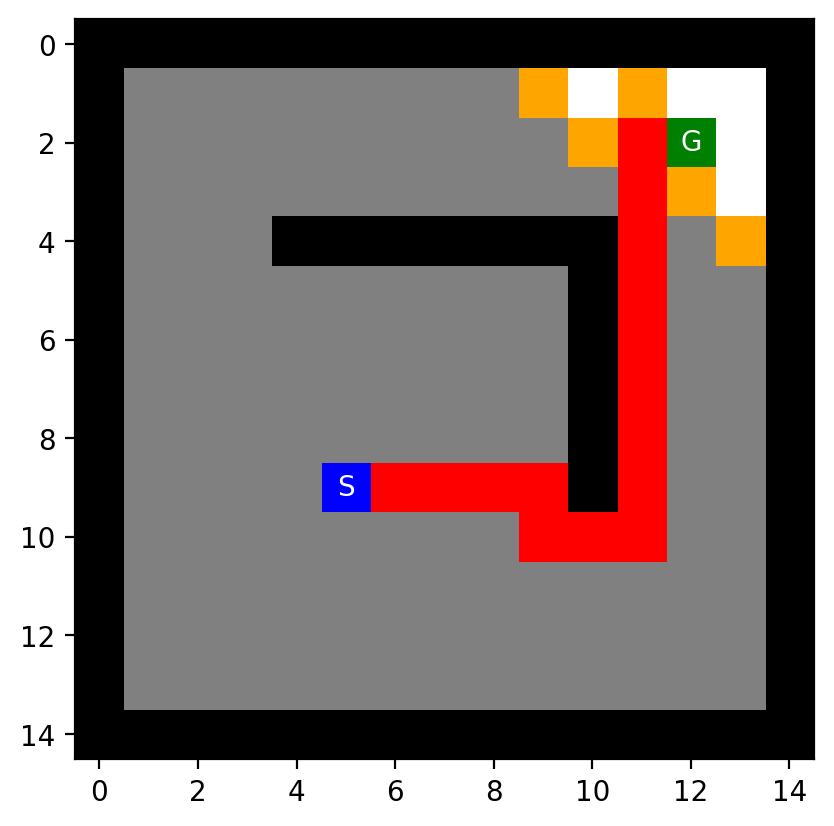

['E',
 'E',
 'E',
 'E',
 'S',
 'E',
 'E',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'E']

In [3]:
ts.set_order("NESW")
#ts.set_order(random=True)

%time result = ts.best_first_search(maze, strategy = "BFS", debug = False, vis = False)
ts.show_path(maze, result)
result['actions']

### DFS 

This implementation uses not reached data structure and has space complexity $O(bm)$ instead of $O(b^m)$ when we reuse the tree search algorithm from BFS!

We need to check for all cycles. If we do not break all cycles correctly, then we will end up in an infinite loop. Here are possible solutions:
* Stop after a fixed number of tries and return no solution `max_tries`.
* IDS solves this problem.

Note on the visualization: I use gray for areas that the algorithm has explored, but DFS has already removed it from memory!

Directions are checked in the order ['N', 'E', 'S', 'W']
CPU times: user 2.36 ms, sys: 386 μs, total: 2.75 ms
Wall time: 2.58 ms
Path length: 122
Reached squares: 145


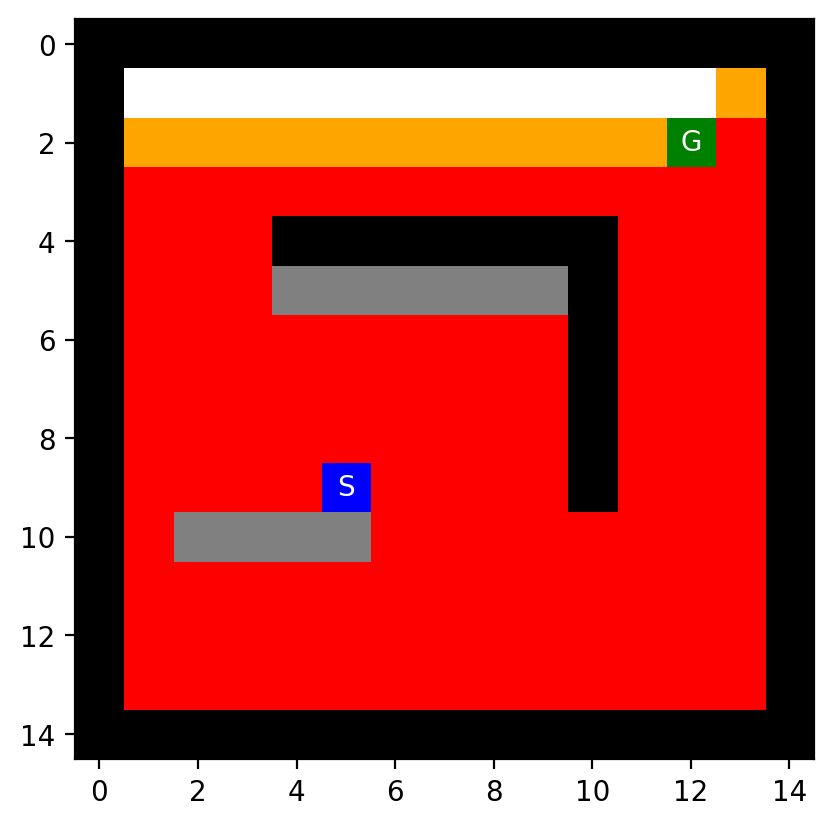

In [4]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!

# Can get stuck for empty maze since cycle checking is not string enough! 
# I use a maximum number of tries and stop if the goal is not reached.
ts.set_order("NESW")
#ts.set_order("SENW")
#ts.set_order("WSEN")
#ts.set_order(random=True)

%time result = ts.DFS(maze, vis = False, max_tries = 100000, debug_reached = True)

#result
ts.show_path(maze, result)
if result['path'] is None:
    print("No solution found!")

Do the same, but change the order in which we explore states (add them to them as nodes to the frontier).

Directions are checked in the order ['S', 'E', 'N', 'W']
CPU times: user 544 μs, sys: 0 ns, total: 544 μs
Wall time: 550 μs
Path length: 26
Reached squares: 53


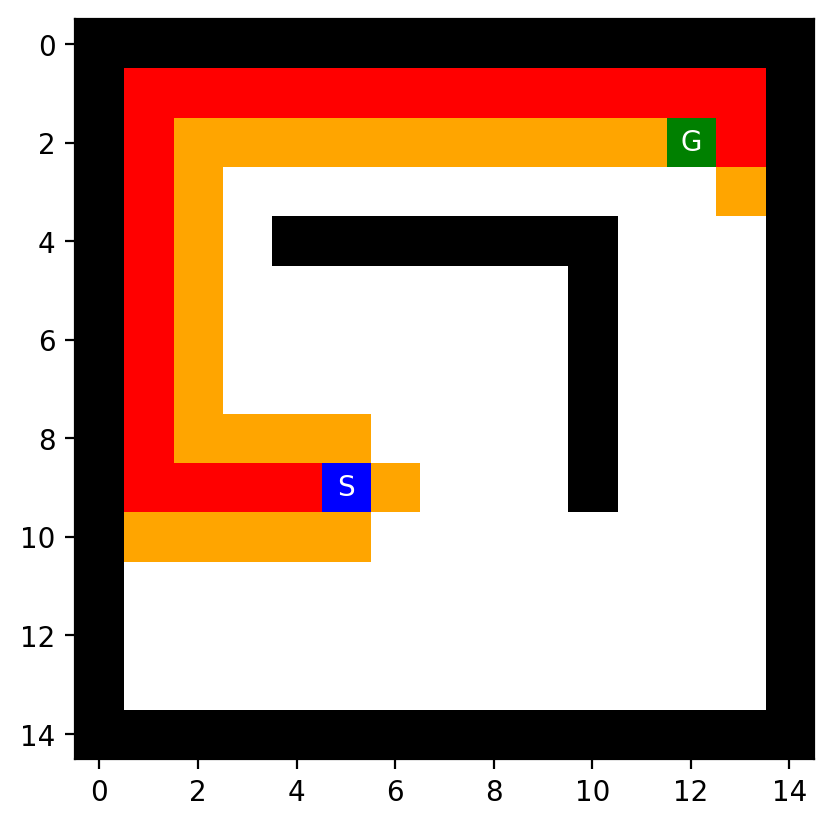

In [5]:
#ts.set_order("NESW")
ts.set_order("SENW")
#ts.set_order("WSEN")
#ts.set_order(random=True)

%time result = ts.DFS(maze, vis = False, max_tries = 100000, debug_reached = True)

#result
ts.show_path(maze, result)
if result['path'] is None:
    print("No solution found!")

We could do a random walk and not check for cycles. This is guaranteed to reach eventually any square including the goal, 
but creates a long path. The path could be simplified leading to the [Tremaux's algorithm](https://en.wikipedia.org/wiki/Maze_solving_algorithm).

Directions are checked at every step in random order.
CPU times: user 40 ms, sys: 0 ns, total: 40 ms
Wall time: 52.4 ms
Path length: 1550
Reached squares: 125


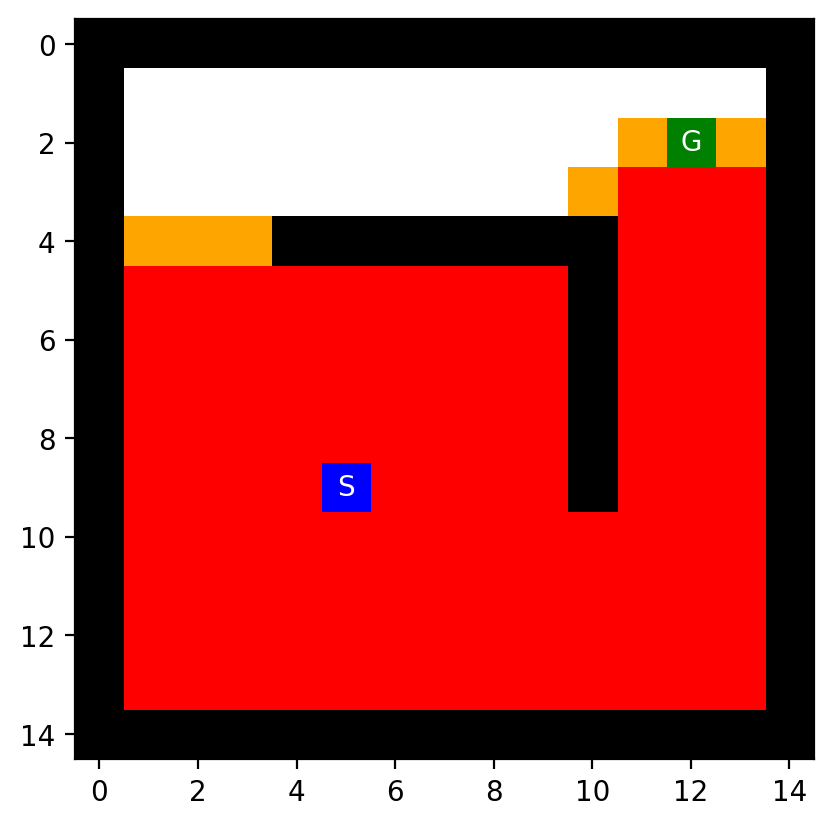

CPU times: user 7.77 ms, sys: 0 ns, total: 7.77 ms
Wall time: 7.77 ms
Path length: 482
Reached squares: 119


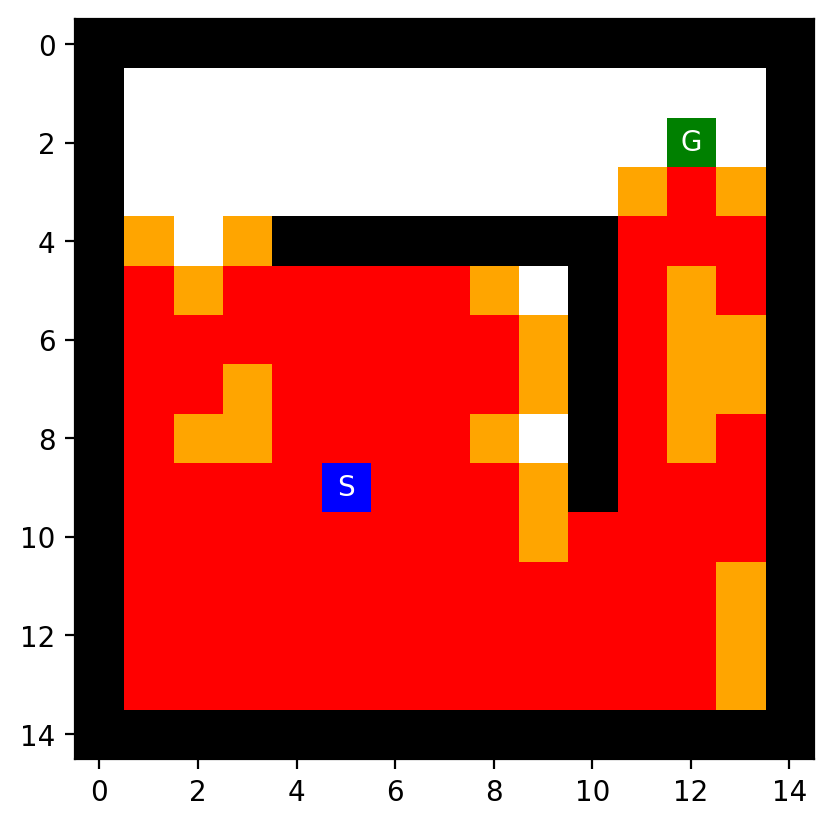

CPU times: user 2.74 ms, sys: 0 ns, total: 2.74 ms
Wall time: 2.76 ms
Path length: 188
Reached squares: 102


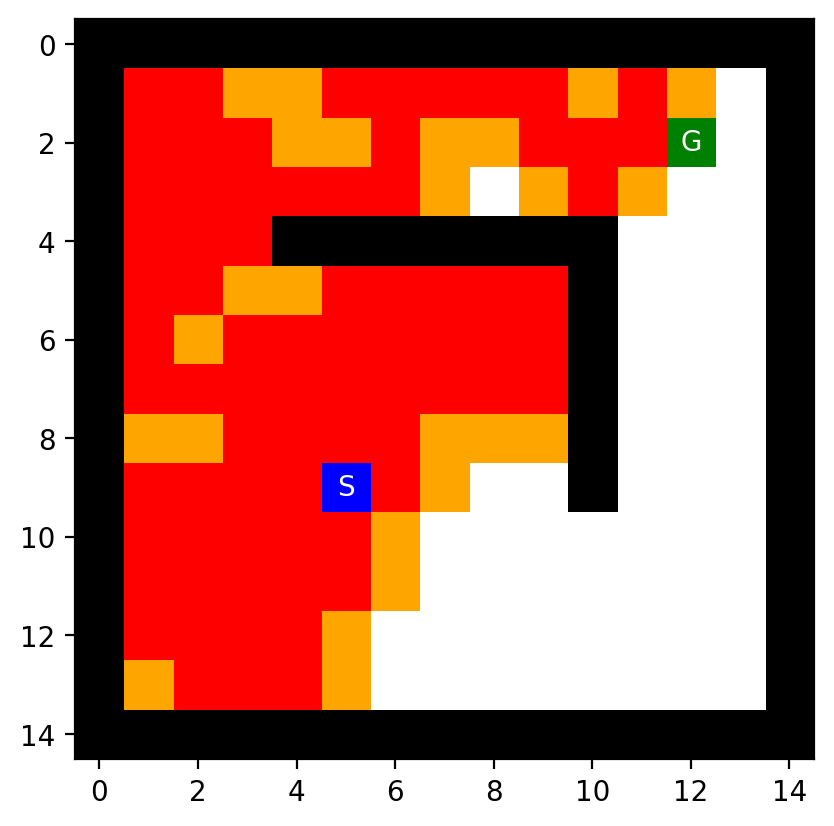

CPU times: user 6.04 ms, sys: 0 ns, total: 6.04 ms
Wall time: 5.88 ms
Path length: 300
Reached squares: 121


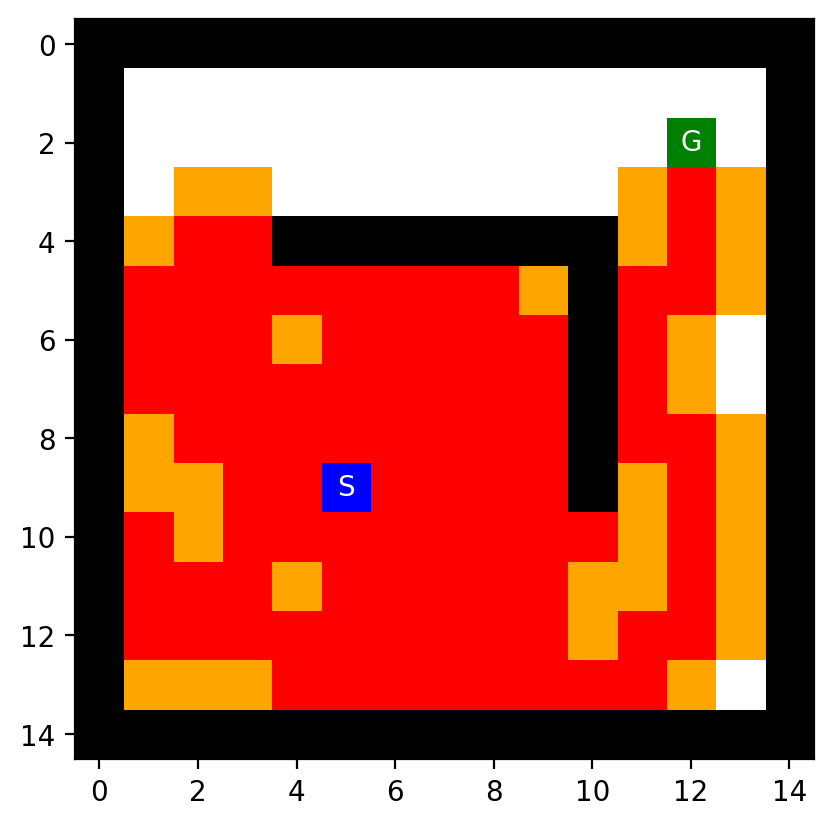

CPU times: user 12.6 ms, sys: 25 μs, total: 12.6 ms
Wall time: 12.6 ms
Path length: 666
Reached squares: 138


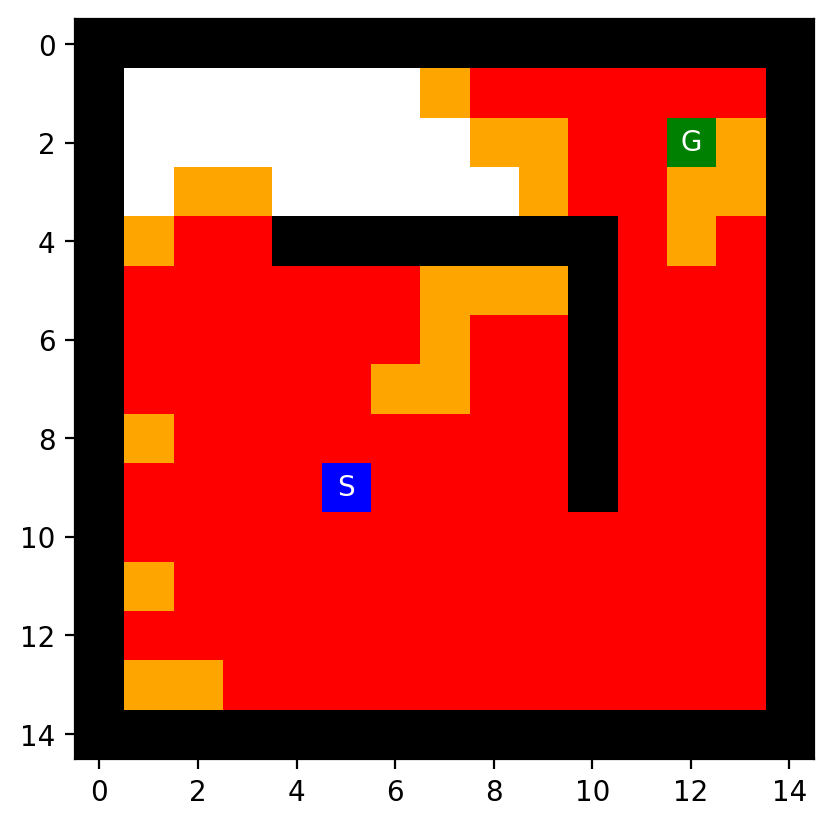

In [6]:
ts.set_order(random = True)

# run it multiple times to see the effect of randomization
for _ in range(5):
    %time result = ts.DFS(maze, check_cycle = False, max_tries = 100000, vis = False, debug_reached = True)

    #result
    ts.show_path(maze, result)
    if result['path'] is None:
        print("No solution found!")

### Run randomized DFS multiple times and use the best solution.

__Note:__ IDS takes a similar amount of time and memory, but is guaranteed optimal.

Directions are checked at every step in random order.
CPU times: user 185 ms, sys: 0 ns, total: 185 ms
Wall time: 184 ms
Solutions have path_lengths of [62, 64, 54, 54, 94, 50, 32, 42, 38, 38, 60, 86, 38, 58, 62, 42, 104, 58, 54, 36, 90, 66, 58, 74, 90, 52, 46, 60, 68, 86, 100, 84, 50, 66, 56, 64, 58, 76, 66, 42, 76, 70, 74, 42, 102, 68, 80, 64, 76, 66, 46, 66, 70, 36, 56, 54, 66, 48, 98, 40, 108, 52, 78, 52, 66, 64, 30, 72, 72, 56, 98, 60, 48, 84, 52, 78, 80, 42, 64, 92, 112, 58, 50, 76, 70, 46, 58, 82, 74, 52, 110, 58, 44, 86, 58, 66, 38, 74, 30, 56]
Path length: 30
Reached squares: 0


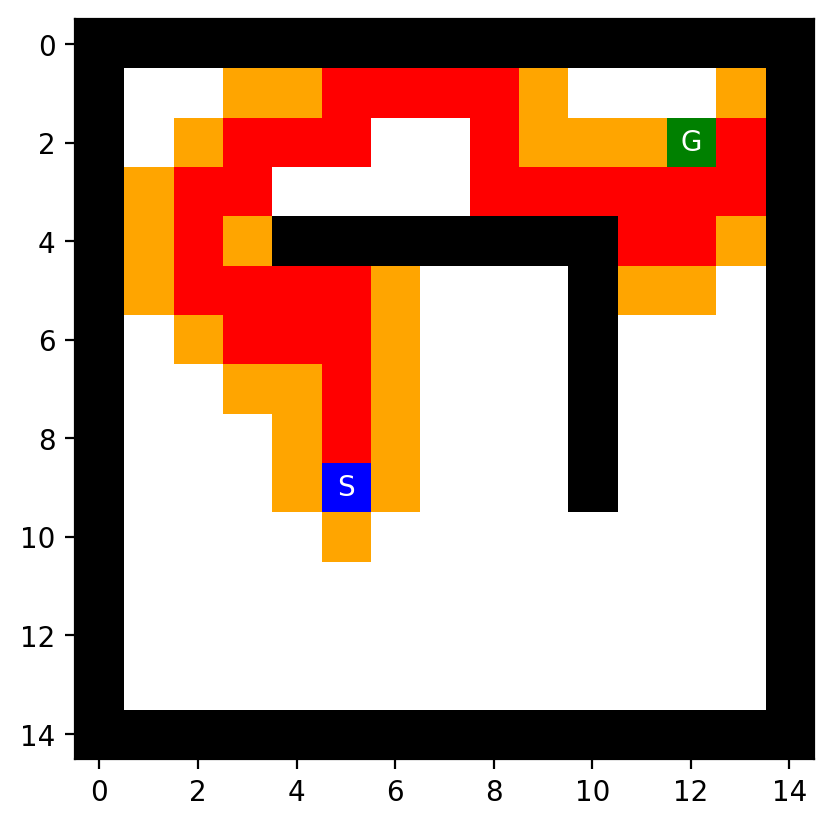

In [7]:
ts.set_order(random = True)

N = 100
%time results = [ ts.DFS(maze, max_tries = 10000, vis = False) for _ in range(N) ]

# check if we found a solution and display the best solution
results = [ r for r in results if not r['path'] is None ]
if len(results) > 0:
    path_lengths = [ len(r['path'])-1 for r in results ]

    print(f"Solutions have path_lengths of {path_lengths}")

    result = results[ts.min_index(path_lengths)]
    ts.show_path(maze, result)
else:
    print("No solution found!")

### Depth limited DFS

Note: The frontier needs to be checked differently during cycle checking!

Directions are checked at every step in random order.
CPU times: user 1.97 ms, sys: 0 ns, total: 1.97 ms
Wall time: 1.98 ms
Reached squares: 57


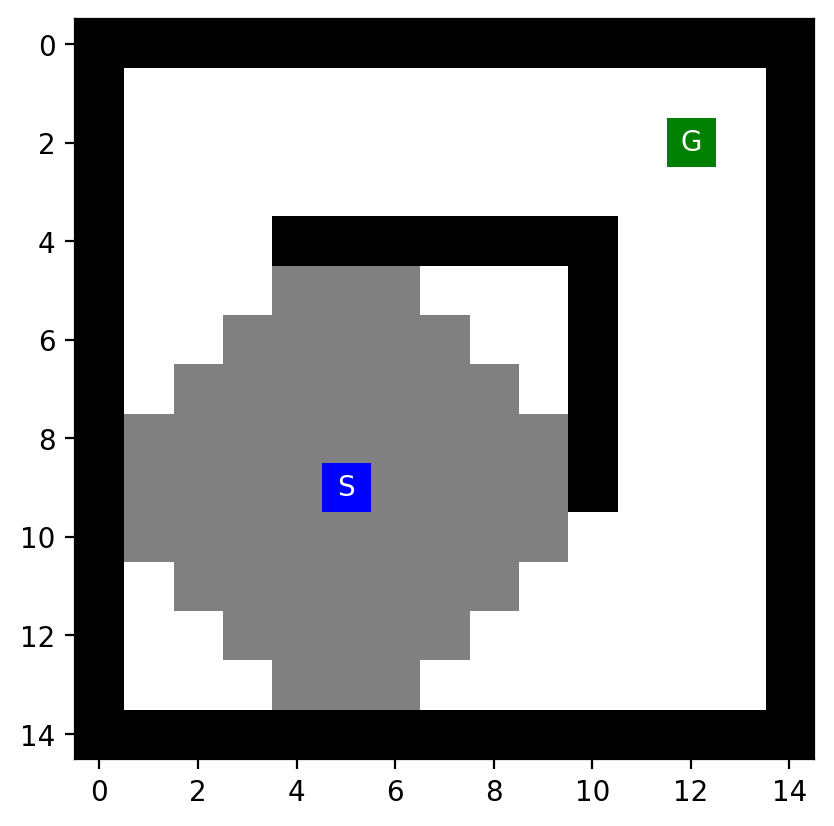

In [8]:
ts.set_order(random = True)

%time result = ts.DFS(maze, limit = 5, frontier_option = 2, max_tries = 100000, vis = False, debug_reached = True)
ts.show_path(maze, result)

### IDS

__Notes:__ 

* IDS with DFS does not store reached squares, so gray areas are not shown!

* IDS depends on the cycle checking of DFS and therefore is also affected by these problems.

Directions are checked at every step in random order.
CPU times: user 2.55 s, sys: 17.8 ms, total: 2.57 s
Wall time: 2.57 s
Path length: 16
Reached squares: 0


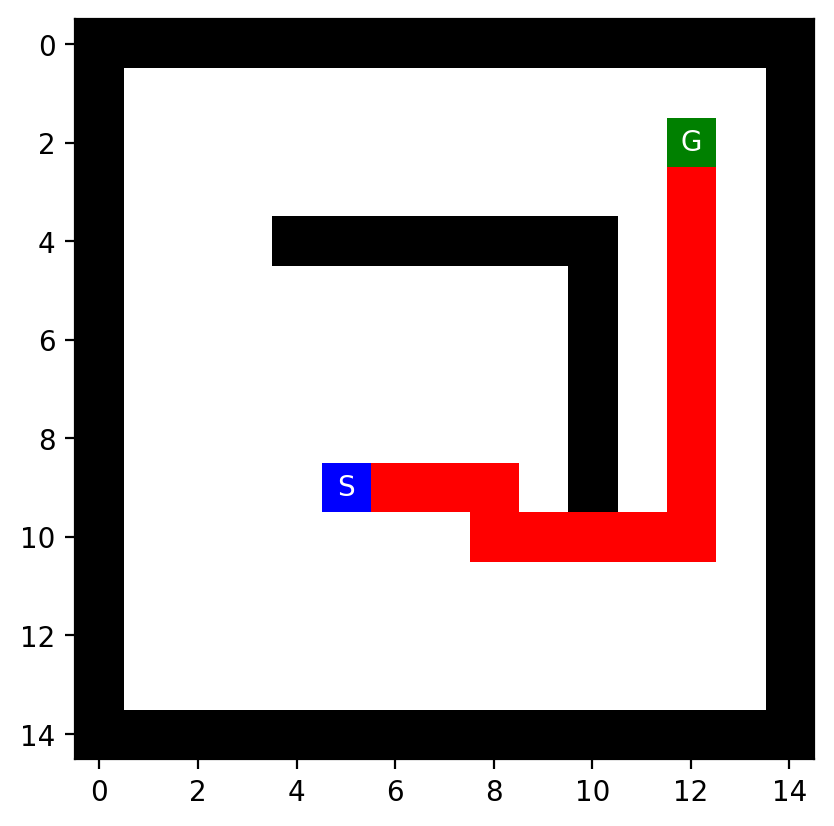

In [9]:
ts.set_order(random = True)

%time result = ts.IDS(maze, frontier_option = 2, max_tries = 100000)
ts.show_path(maze, result)

### Greedy Best-First Search (GBFS)

In [10]:
# set the heuristic to Manhattan distance
ts.heuristic = ts.manhattan

Directions are checked at every step in random order.
CPU times: user 1.21 ms, sys: 119 μs, total: 1.33 ms
Wall time: 1.33 ms
Path length: 22
Reached squares: 61


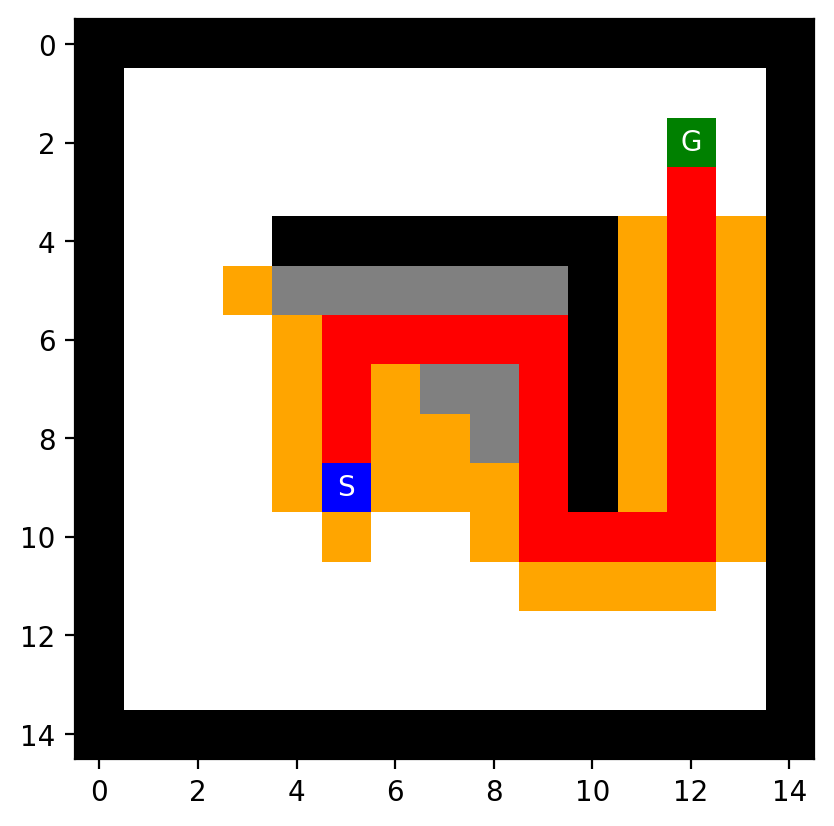

In [11]:
ts.set_order(random=True)

%time result = ts.best_first_search(maze, strategy = "GBFS", debug = False, vis = False)
ts.show_path(maze, result)

### A* Search

Directions are checked at every step in random order.
CPU times: user 1.49 ms, sys: 144 μs, total: 1.63 ms
Wall time: 1.63 ms
Path length: 16
Reached squares: 67


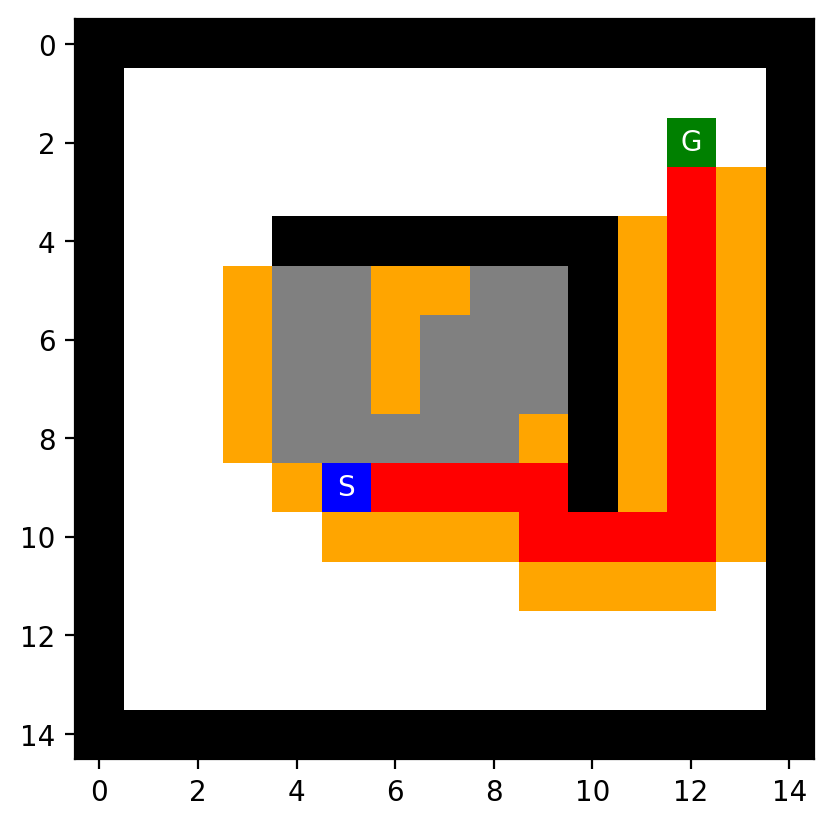

In [12]:
ts.set_order(random=True)

%time result = ts.best_first_search(maze, strategy = "A*", debug = False, vis = False)
ts.show_path(maze, result)

### Weighted A* Search

$W > 1$ tends towards GBFS (optimality is not guaranteed)

Directions are checked at every step in random order.
CPU times: user 1.6 ms, sys: 154 μs, total: 1.75 ms
Wall time: 1.75 ms
Path length: 16
Reached squares: 61


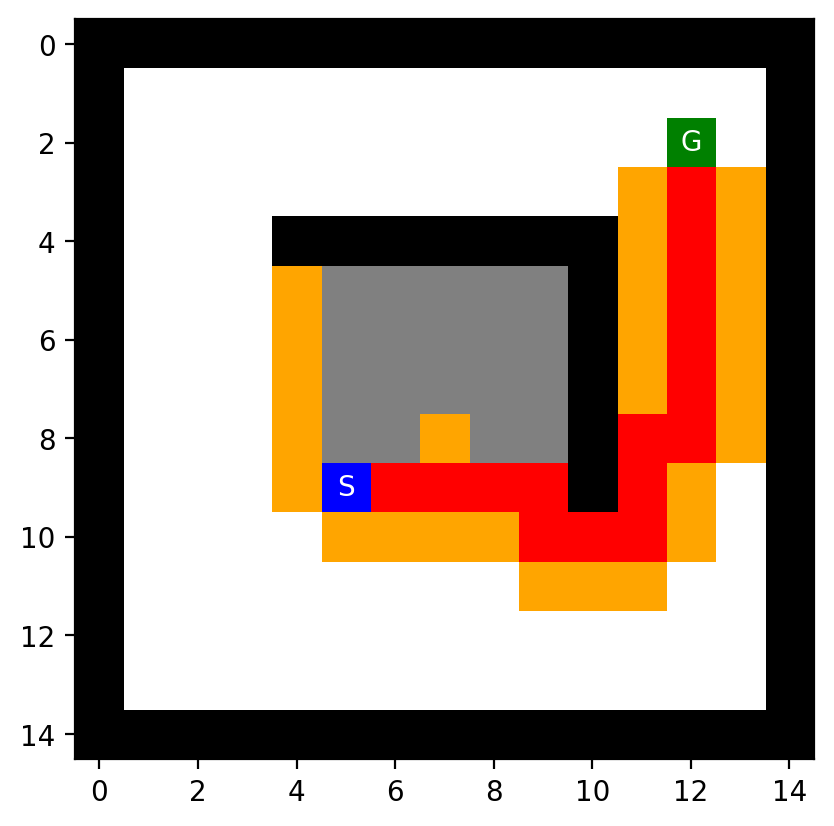

In [13]:
ts.set_order(random=True)

%time result = ts.best_first_search(maze, strategy = "A*", W = 1+1e-9, debug = False, vis = False)
ts.show_path(maze, result)

CPU times: user 1.85 ms, sys: 179 μs, total: 2.03 ms
Wall time: 2.07 ms
Path length: 18
Reached squares: 59


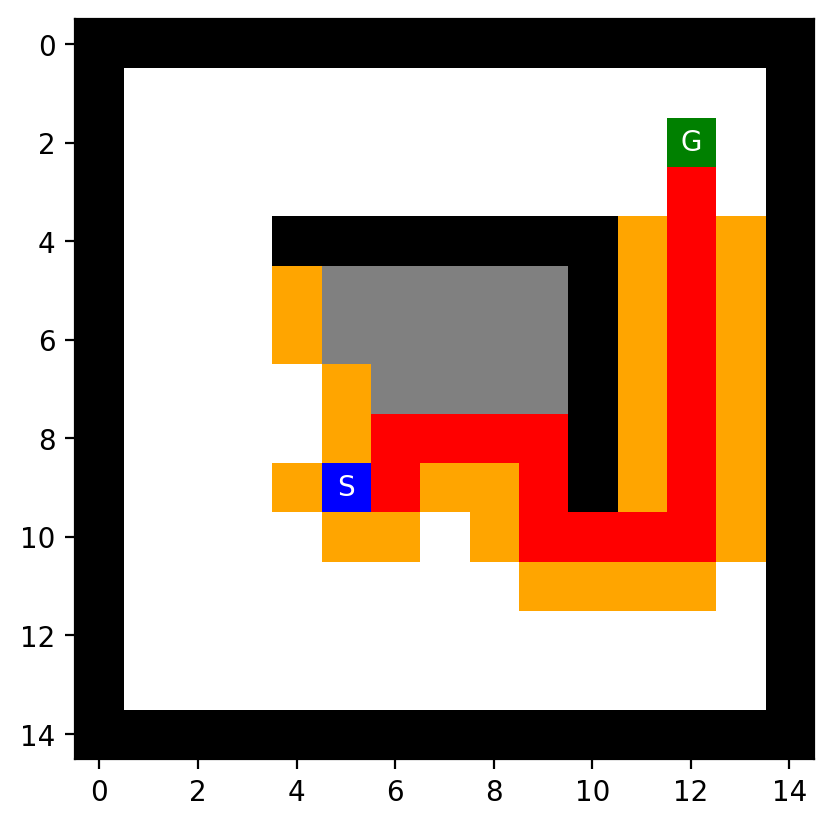

In [14]:
%time result = ts.best_first_search(maze, strategy = "A*", W = 5, debug = False, vis = False)
ts.show_path(maze, result)

CPU times: user 1.33 ms, sys: 0 ns, total: 1.33 ms
Wall time: 1.35 ms
Path length: 16
Reached squares: 56


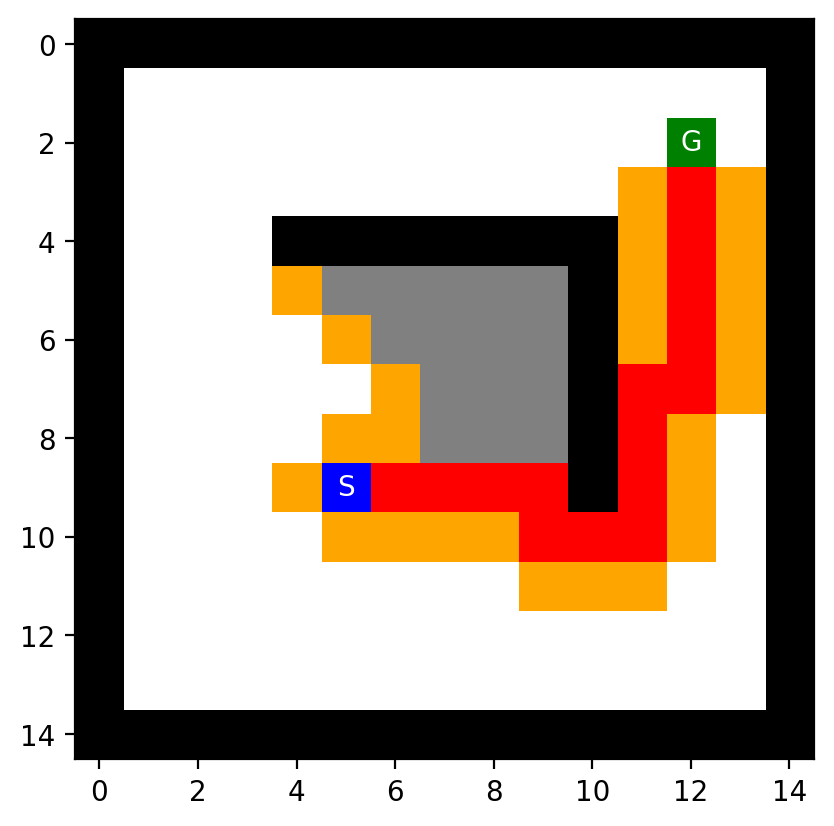

In [15]:
%time result = ts.best_first_search(maze, strategy = "A*", W = 1000, debug = False, vis = False)
ts.show_path(maze, result)

$W<1$ tends towards Uniform-Cost Search/BFS (optimality is guaranteed)

CPU times: user 13.1 ms, sys: 87 μs, total: 13.2 ms
Wall time: 12.1 ms
Path length: 16
Reached squares: 113


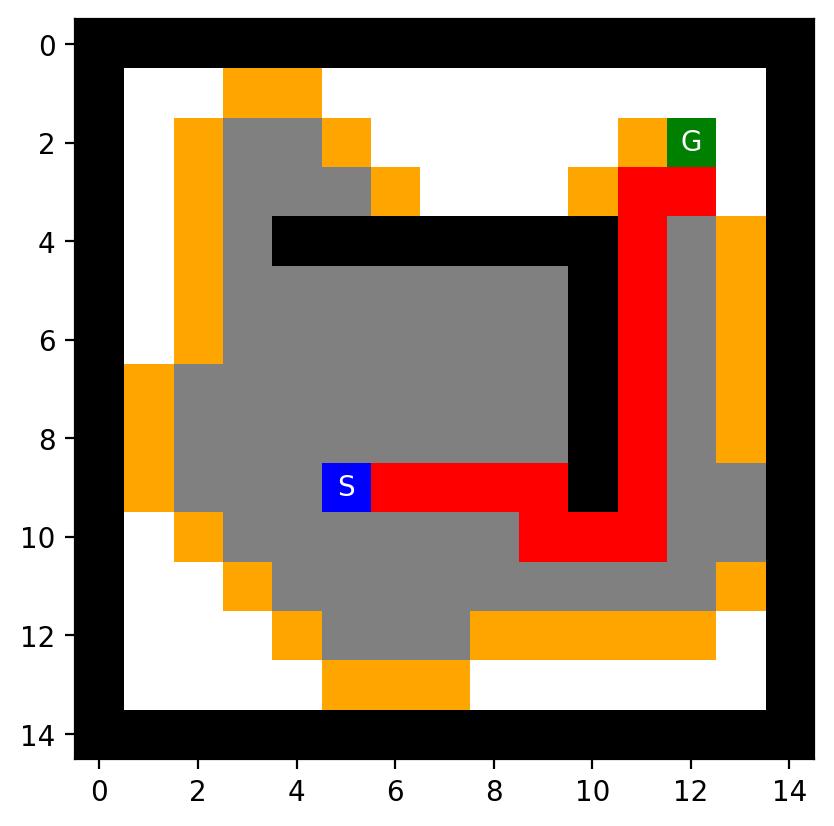

In [16]:
%time result = ts.best_first_search(maze, strategy = "A*", W = .7, debug = False, vis = False)
ts.show_path(maze, result)

CPU times: user 12.4 ms, sys: 14 μs, total: 12.4 ms
Wall time: 12.2 ms
Path length: 16
Reached squares: 150


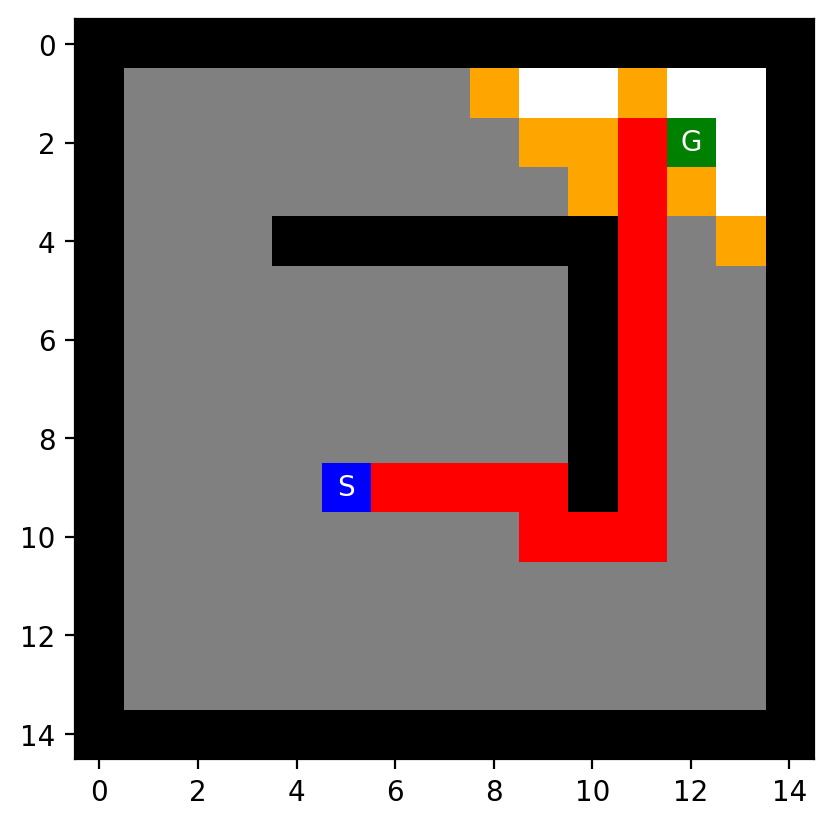

In [17]:
%time result = ts.best_first_search(maze, strategy = "A*", W = .0001, debug = False, vis = False)
ts.show_path(maze, result)

### Compare Timing

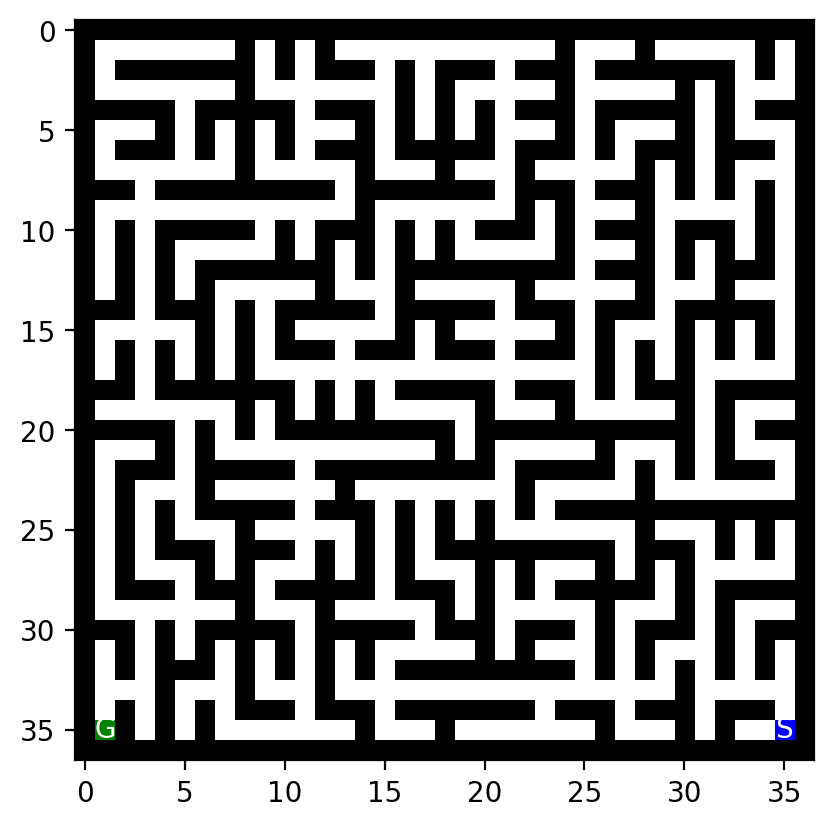

Directions are checked at every step in random order.


In [18]:
#f = open("small_maze.txt", "r")
#f = open("medium_maze.txt", "r")
f = open("large_maze.txt", "r")    # this has only one solution!
#f = open("open_maze.txt", "r")
#f = open("empty_maze.txt", "r")
#f = open("empty_maze_2.txt", "r")
#f = open("L_maze.txt", "r")
#f = open("loops_maze.txt", "r")

maze_str = f.read()
maze = parse_maze(maze_str)

ts.show_maze(maze)

ts.set_order(random=True)


In [22]:
import timeit
import math

reps = 10

times = {}

algorithms = ["BFS", "DFS", "GBFS", "A*"]

### FIXME: add IDS

for a in algorithms:
    times[a] = math.ceil(timeit.timeit(stmt = f'ts.best_first_search(maze, strategy = "{a}", debug = False, vis = False)', 
              setup = 'from __main__ import ts, maze',
                    number = reps)*1e6/reps)
    
times['DFS(no reached)'] = math.ceil(timeit.timeit(stmt = f'ts.DFS(maze, vis = False)', 
              setup = 'from __main__ import ts, maze',
                    number = reps)*1e6/reps)

times['IDS'] = math.ceil(timeit.timeit(stmt = f'ts.IDS(maze, vis = False)', 
              setup = 'from __main__ import ts, maze',
                    number = reps)*1e6/reps)

In [23]:
import pandas as pd
df = pd.DataFrame(times, index = ["time in micro seconds"])
df

,BFS,DFS,GBFS,A*,DFS(no reached),IDS
time in micro seconds,8128,3758,10072,11679,9134,1129534


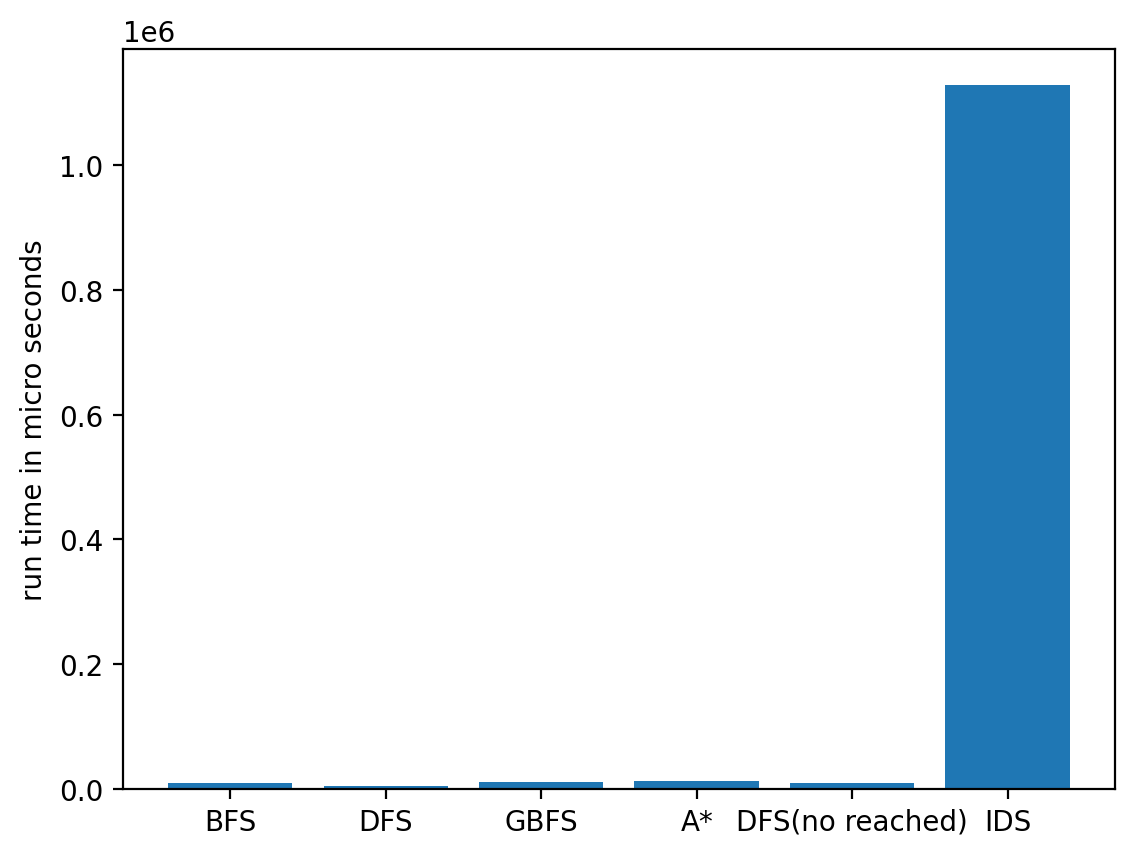

In [24]:
import matplotlib.pyplot as plt

plt.bar(df.columns, height = df.iloc[0])
plt.ylabel("run time in micro seconds")
plt.show()